In [1]:
import numpy as np
from igraph import *
import pandas as pd
import sys

import sys
sys.path.append('C:\\Users\\Anubhav\\Documents\\GitHub\\ddot')

import ddot
from ddot import Ontology
import matplotlib
from matplotlib import pyplot as plt
import networkx as nx
import csv
import scipy.stats as ss
from scipy.stats import hypergeom
from statsmodels.sandbox.stats.multicomp import multipletests

from collections import defaultdict
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import networkx as nx 

import matplotlib.pyplot as plt 
%matplotlib inline

20.715384615384615
5.0
0.25     2.0
0.75    15.0
Name: Parent, dtype: float64


Text(0, 0.5, 'Frequency')

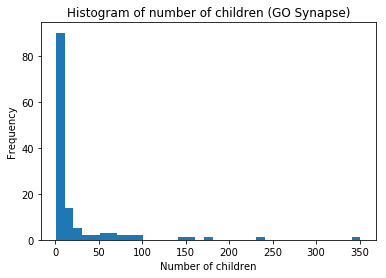

In [2]:
#Mean and median for Synapse ontology

data = pd.read_table("synapse.txt")
print(data.Parent.value_counts().mean())
print(data.Parent.value_counts().median())
print(data.Parent.value_counts().quantile([0.25,0.75]))

#print(data.Parent.value_counts())

plt.hist(data.Parent.value_counts(), bins=range(min(data.Parent.value_counts()), max(data.Parent.value_counts())+10, 10))
plt.title('Histogram of number of children (GO Synapse)')
plt.xlabel('Number of children')
plt.ylabel('Frequency')

In [3]:
print(len(set(data.Child[data.EdgeType=="Child-Parent"])))
print(len(set(data.Child[data.EdgeType=="Gene-Term"])))

192
1177


#### Distribution of submodules 

In [26]:
#distribution for the breadth of child-parent edges
#Loading clixo data
our_ont = 'option4_string_synapse_interactions_combined_score.clixo_alpha0.2_beta0.6.txt'
clixo_ont = pd.read_table(our_ont, dtype=str)

data = clixo_ont[clixo_ont.EdgeType == 'Child-Parent']

parent_groups = data.groupby('Parent')
gene_dist = parent_groups.Child.count()

#print(gene_dist)

print(gene_dist.mean())
print(gene_dist.median())
print(gene_dist.min())
print(gene_dist.quantile([0.25,0.75]).tolist(), sep='\n')
print(gene_dist.max())

#print(data.Parent.value_counts())

17.666666666666668
1.0
1
[1.0, 1.75]
191


#### Distribution of genes per module  

In [27]:
#distribution for the breadth of child-parent edges
#Loading clixo data
our_ont = 'option4_string_synapse_interactions_combined_score.clixo_alpha0.2_beta0.6.txt'
clixo_ont = pd.read_table(our_ont, dtype=str)

data = clixo_ont[clixo_ont.EdgeType == 'Gene-Term']

parent_groups = data.groupby('Parent')
gene_dist = parent_groups.Child.count()

#print(gene_dist)

print(gene_dist.mean())
print(gene_dist.median())
print(gene_dist.min())
print(gene_dist.quantile([0.25,0.75]).tolist(), sep='\n')
print(gene_dist.max())

#print(data.Parent.value_counts())

23.164319248826292
12.0
3
[8.0, 22.0]
427


In [16]:
gene_dist

Parent
1847      1
1851      1
1852      1
1855      1
1862      1
1875      1
1881      1
1882      1
1884      1
1890      8
1891      4
1892    191
Name: Child, dtype: int64

In [11]:
data

,Parent,Child,EdgeType
1995,1847,1755,Child-Parent
2091,1851,1744,Child-Parent
2109,1852,1761,Child-Parent
2175,1855,1811,Child-Parent
2374,1862,1753,Child-Parent
2836,1875,1865,Child-Parent
3164,1881,1716,Child-Parent
3222,1882,1782,Child-Parent
3375,1884,1775,Child-Parent
4268,1890,1798,Child-Parent


In [5]:
#distribution for our calculate ontology
#Loading clixo data
our_ont = 'option4_string_synapse_interactions_combined_score.clixo_alpha0.2_beta0.6.txt'
clixo_ont = pd.read_table(our_ont, dtype=str)

data = clixo_ont
print(data.Parent.value_counts().mean())
print(data.Parent.value_counts().median())
print(data.Parent.value_counts().quantile([0.25,0.75]))

#print(data.Parent.value_counts())

24.15962441314554
12.0
0.25     8.0
0.75    22.0
Name: Parent, dtype: float64


Text(0, 0.5, 'Frequency')

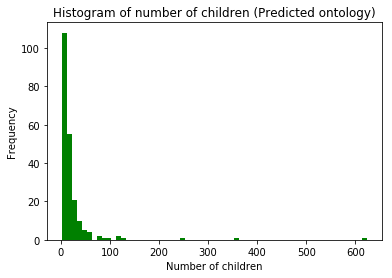

In [6]:
plt.hist(data.Parent.value_counts(), bins=range(min(data.Parent.value_counts()), max(data.Parent.value_counts())+10, 10), color="green")
plt.title('Histogram of number of children (Predicted ontology)')
plt.xlabel('Number of children')
plt.ylabel('Frequency')

In [7]:
print(len(set(data.Child[data.EdgeType=="Child-Parent"])))
print(len(set(data.Child[data.EdgeType=="Gene-Term"])))

212
1680


In [8]:
## The appropriate way to calculate the number of modules...

print ('num synapse ontology terms', len(Ontology.from_table('finalontology2.txt').terms))
print ('num synapse ontology terms', len(Ontology.from_table('synapse.txt').terms))

num synapse ontology terms 372
num synapse ontology terms 193


In [9]:
clixo_ont


,Parent,Child,EdgeType
0,1680,C11orf85,Gene-Term
1,1680,CCDC79,Gene-Term
2,1680,C15orf43,Gene-Term
3,1681,RTN3,Gene-Term
4,1681,SLC30A3,Gene-Term
5,1681,AP3D1,Gene-Term
6,1682,ADCY1,Gene-Term
7,1682,HRAS,Gene-Term
8,1682,RAF1,Gene-Term
9,1682,PIK3CA,Gene-Term
